In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

Data Curation

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open('/content/kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:16<00:00, 255MB/s]
100% 2.04G/2.04G [00:16<00:00, 131MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip","r") as zip_ref: # Now ZipFile is correctly referenced
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Strawberry___Leaf_scorch', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Strawberry___Leaf_scorch', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Strawberry___Leaf_scorch', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


Number of Classes

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['2535a8a8-1676-482d-bf8e-6f4c54f87fc6___Mt.N.V_HL 6080.JPG', 'a889fb1b-e7cb-4026-a42e-a09558e00ca8___Mt.N.V_HL 9020.JPG', '389058a6-634c-4cdb-a17c-8385b36dacd9___Mt.N.V_HL 6030.JPG', 'cad08b01-b03c-4bee-a786-a6118ec09c37___Mt.N.V_HL 6081.JPG', '198fbad6-0192-4263-96c8-74c330667d61___Mt.N.V_HL 9032.JPG']


Data preprocessing


In [ ]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


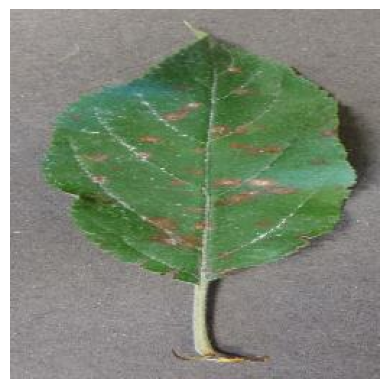

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0ce943e7-3fed-41cb-8430-0e0f54ff2bc4___FREC_C.Rust 0014.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_size = 224
batch_size = 32

Train-Test Split

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer ='adam',
              loss= 'categorical_crossentropy',
              metrics =['accuracy'])

Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1020/1358 ━━━━━━━━━━━━━━━━━━━━ 19:52 4s/step - accuracy: 0.5642 - loss: 2.1412

Model Evaluation

In [ ]:
print("Evaluating model...")
val_loss, val_accuraacy = model.evaluate(validation_generator, steps=validation_generator.samples//batch_size)
print(f"Validation accuracy: {val_accuraacy * 100:.2f}%")

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32')/255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path = '/content/1e5ba644-efeb-4bd3-b878-a0606cf8a992___RS_Late.B 6272_flipLR.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

print('Predicticed Class Name:', predicted_class_name)

In [ ]:
model.save('plant_disease_prediction_model.h5')